In [80]:
#Import packages to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
#set the figure size
matplotlib.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.filterwarnings('ignore')

In [81]:
#ignore the warning
pd.options.mode.chained_assignment = None

In [82]:
pd.set_option("max_rows",1000)

In [83]:
df = pd.read_csv("listings.csv")
#Look at how many rows are with missing values.
np.sum(df.isnull())

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               2
summary                                          228
space                                           2196
description                                      111
experiences_offered                                0
neighborhood_overview                           2825
notes                                           4834
transit                                         2730
access                                          3557
interaction                                     3065
house_rules                                     3408
thumbnail_url                                   9329
medium_url                                      9329
picture_url                                        0
xl_picture_url                                

In [84]:
df.neighbourhood

0                    Shaw
1              Manor Park
2       U Street Corridor
3               Anacostia
4          Mount Pleasant
              ...        
9324             Fairlawn
9325             Fairlawn
9326            Gallaudet
9327             Fairlawn
9328             Fairlawn
Name: neighbourhood, Length: 9329, dtype: object

In [85]:
#To see the percentage of missing values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{0} - {1}%'.format(col,round(pct_missing*100)))

id - 0.0%
listing_url - 0.0%
scrape_id - 0.0%
last_scraped - 0.0%
name - 0.0%
summary - 2.0%
space - 24.0%
description - 1.0%
experiences_offered - 0.0%
neighborhood_overview - 30.0%
notes - 52.0%
transit - 29.0%
access - 38.0%
interaction - 33.0%
house_rules - 37.0%
thumbnail_url - 100.0%
medium_url - 100.0%
picture_url - 0.0%
xl_picture_url - 100.0%
host_id - 0.0%
host_url - 0.0%
host_name - 0.0%
host_since - 0.0%
host_location - 0.0%
host_about - 35.0%
host_response_time - 32.0%
host_response_rate - 32.0%
host_acceptance_rate - 24.0%
host_is_superhost - 0.0%
host_thumbnail_url - 0.0%
host_picture_url - 0.0%
host_neighbourhood - 10.0%
host_listings_count - 0.0%
host_total_listings_count - 0.0%
host_verifications - 0.0%
host_has_profile_pic - 0.0%
host_identity_verified - 0.0%
street - 0.0%
neighbourhood - 0.0%
neighbourhood_cleansed - 0.0%
neighbourhood_group_cleansed - 100.0%
city - 0.0%
state - 0.0%
zipcode - 1.0%
market - 0.0%
smart_location - 0.0%
country_code - 0.0%
country - 0.

In [86]:
#select columns with less than 50% missing values
df = df.loc[:, df.isnull().mean() < .5]

In [87]:
#lets see what remanin columns are 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{0} - {1}%'.format(col,round(pct_missing*100)))

id - 0.0%
listing_url - 0.0%
scrape_id - 0.0%
last_scraped - 0.0%
name - 0.0%
summary - 2.0%
space - 24.0%
description - 1.0%
experiences_offered - 0.0%
neighborhood_overview - 30.0%
transit - 29.0%
access - 38.0%
interaction - 33.0%
house_rules - 37.0%
picture_url - 0.0%
host_id - 0.0%
host_url - 0.0%
host_name - 0.0%
host_since - 0.0%
host_location - 0.0%
host_about - 35.0%
host_response_time - 32.0%
host_response_rate - 32.0%
host_acceptance_rate - 24.0%
host_is_superhost - 0.0%
host_thumbnail_url - 0.0%
host_picture_url - 0.0%
host_neighbourhood - 10.0%
host_listings_count - 0.0%
host_total_listings_count - 0.0%
host_verifications - 0.0%
host_has_profile_pic - 0.0%
host_identity_verified - 0.0%
street - 0.0%
neighbourhood - 0.0%
neighbourhood_cleansed - 0.0%
city - 0.0%
state - 0.0%
zipcode - 1.0%
market - 0.0%
smart_location - 0.0%
country_code - 0.0%
country - 0.0%
latitude - 0.0%
longitude - 0.0%
is_location_exact - 0.0%
property_type - 0.0%
room_type - 0.0%
accommodates - 0.0%


## Now let's look at the irrelevant observations.
* Eliminates columns with irrelevant observations.


In [88]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df.columns)]
col_mapping

['0:id',
 '1:listing_url',
 '2:scrape_id',
 '3:last_scraped',
 '4:name',
 '5:summary',
 '6:space',
 '7:description',
 '8:experiences_offered',
 '9:neighborhood_overview',
 '10:transit',
 '11:access',
 '12:interaction',
 '13:house_rules',
 '14:picture_url',
 '15:host_id',
 '16:host_url',
 '17:host_name',
 '18:host_since',
 '19:host_location',
 '20:host_about',
 '21:host_response_time',
 '22:host_response_rate',
 '23:host_acceptance_rate',
 '24:host_is_superhost',
 '25:host_thumbnail_url',
 '26:host_picture_url',
 '27:host_neighbourhood',
 '28:host_listings_count',
 '29:host_total_listings_count',
 '30:host_verifications',
 '31:host_has_profile_pic',
 '32:host_identity_verified',
 '33:street',
 '34:neighbourhood',
 '35:neighbourhood_cleansed',
 '36:city',
 '37:state',
 '38:zipcode',
 '39:market',
 '40:smart_location',
 '41:country_code',
 '42:country',
 '43:latitude',
 '44:longitude',
 '45:is_location_exact',
 '46:property_type',
 '47:room_type',
 '48:accommodates',
 '49:bathrooms',
 '50

In [89]:
df = df.iloc[:,np.r_[19,21:24,27:72,74:96]]

In [90]:
df.shape

(9329, 71)

In [91]:
# we want keep these two variable, so filter out row with empties in the three columns.
df = df[df['host_response_time'].notna()]
df = df[df["review_scores_value"].notna()]
df = df[df['review_scores_accuracy'].notnull()]

## Choosing our variables again

* First, let's toss out some variables. Our reasons why we chose those variables included too many NaN in that column(and we think it's also hard to replace it with other made-up value) or based on our domain knowledge, we thinks it will has tiny effects on our final predictions. 

In [92]:
#choosing variables
df = df.iloc[:,np.r_[1:3,6:9,11,22:49,53:60,62:70]]

In [93]:
print("Now we have {} columns".format(len(df.columns)))

Now we have 48 columns


In [94]:
# An overview of our currently dataset.
df.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,within an hour,100%,5.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Shaw,t,Townhouse,Entire home/apt,16,...,10.0,9.0,t,f,strict_14_with_grace_period,f,f,5,5,0
3,within a few hours,100%,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Anacostia,f,House,Private room,1,...,8.0,9.0,f,f,moderate,f,f,2,0,2
5,within an hour,100%,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,Michigan Park,t,House,Entire home/apt,9,...,8.0,8.0,t,f,flexible,f,t,1,1,0
6,within an hour,100%,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Capitol Hill,t,House,Private room,2,...,10.0,10.0,f,f,moderate,f,f,2,0,2
8,within a few hours,100%,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Eastland Gardens,t,House,Private room,4,...,9.0,10.0,f,f,strict_14_with_grace_period,t,t,2,0,2


In [95]:
#Let's see which columns still contain missing values.
np.sum(df.isnull())

host_response_time                                 0
host_response_rate                                 0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
neighbourhood                                      0
is_location_exact                                  0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          5
bedrooms                                           4
beds                                               8
bed_type                                           0
amenities                                          0
price                                              0
security_deposit                                1032
cleaning_fee                                     333
guests_included                               

## Cleaning the data!
* We try imputing the more data instead of dropping missing variable or imputing 0. We impute mean, median or mode to respective columns. We try to make the data more close the normal distribution when it contain missing values and we think imputing the mean, median, or mode is  the most appropriate way.

In [96]:
#Look at our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5444 entries, 0 to 9285
Data columns (total 48 columns):
host_response_time                              5444 non-null object
host_response_rate                              5444 non-null object
host_total_listings_count                       5444 non-null float64
host_verifications                              5444 non-null object
host_has_profile_pic                            5444 non-null object
neighbourhood                                   5444 non-null object
is_location_exact                               5444 non-null object
property_type                                   5444 non-null object
room_type                                       5444 non-null object
accommodates                                    5444 non-null int64
bathrooms                                       5439 non-null float64
bedrooms                                        5440 non-null float64
beds                                            5436 non-null f

### Part 1: Keep only numbers in Numerical variables and data type tranformation

In [18]:
df.price = df.price.str.replace('$',"")
df.extra_people = df.extra_people.str.replace('$',"")
df.host_response_rate = df.host_response_rate.str.replace('%','') 

In [19]:
#covert host_verificatio into dummies 
df.host_verifications= df.host_verifications.str.replace("[",'')
df.host_verifications= df.host_verifications.str.replace("]",'')
df.host_verifications= df.host_verifications.str.replace("\'",'')
df.host_verifications = df.host_verifications.str.split(',')

In [20]:
df.security_deposit = df.security_deposit.str.replace("$",'')
df.security_deposit = df.security_deposit.str.replace(",",'').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace("$",'')
df.cleaning_fee = df.cleaning_fee.str.replace(",",'').astype(float)
df.extra_people = df.extra_people.str.replace("$",'')
df.extra_people = df.extra_people.str.replace(",",'').astype(float)

In [21]:
df.price= df.price.str.replace(",",'').astype(float)
df.cleaning_fee= df.cleaning_fee.astype(float)

In [22]:
df.amenities = df.amenities.str.replace("{",'')
df.amenities = df.amenities.str.replace("}",'')
df.amenities = df.amenities.str.replace("\"",'')
df.amenities = df.amenities.str.split(',')
df.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,within an hour,100,5.0,"[email, phone, facebook, reviews, kba, wo...",t,Shaw,t,Townhouse,Entire home/apt,16,...,10.0,9.0,t,f,strict_14_with_grace_period,f,f,5,5,0
3,within a few hours,100,2.0,"[email, phone, reviews, jumio, offline_gov...",t,Anacostia,f,House,Private room,1,...,8.0,9.0,f,f,moderate,f,f,2,0,2
5,within an hour,100,2.0,"[email, phone, facebook, reviews, kba, wo...",t,Michigan Park,t,House,Entire home/apt,9,...,8.0,8.0,t,f,flexible,f,t,1,1,0
6,within an hour,100,2.0,"[email, phone, facebook, reviews, kba]",t,Capitol Hill,t,House,Private room,2,...,10.0,10.0,f,f,moderate,f,f,2,0,2
8,within a few hours,100,3.0,"[email, phone, facebook, reviews, jumio, ...",t,Eastland Gardens,t,House,Private room,4,...,9.0,10.0,f,f,strict_14_with_grace_period,t,t,2,0,2


### Part 2: Imputing missing values

In [23]:
df.security_deposit= df.security_deposit.fillna(value=0)
df.cleaning_fee = df.cleaning_fee.fillna(0)
df.bathrooms = df.bathrooms.fillna(0)
df.beds= df.beds.fillna(0)
df.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,within an hour,100,5.0,"[email, phone, facebook, reviews, kba, wo...",t,Shaw,t,Townhouse,Entire home/apt,16,...,10.0,9.0,t,f,strict_14_with_grace_period,f,f,5,5,0
3,within a few hours,100,2.0,"[email, phone, reviews, jumio, offline_gov...",t,Anacostia,f,House,Private room,1,...,8.0,9.0,f,f,moderate,f,f,2,0,2
5,within an hour,100,2.0,"[email, phone, facebook, reviews, kba, wo...",t,Michigan Park,t,House,Entire home/apt,9,...,8.0,8.0,t,f,flexible,f,t,1,1,0
6,within an hour,100,2.0,"[email, phone, facebook, reviews, kba]",t,Capitol Hill,t,House,Private room,2,...,10.0,10.0,f,f,moderate,f,f,2,0,2
8,within a few hours,100,3.0,"[email, phone, facebook, reviews, jumio, ...",t,Eastland Gardens,t,House,Private room,4,...,9.0,10.0,f,f,strict_14_with_grace_period,t,t,2,0,2


### Remove high correlation features to avoid collinearity issue

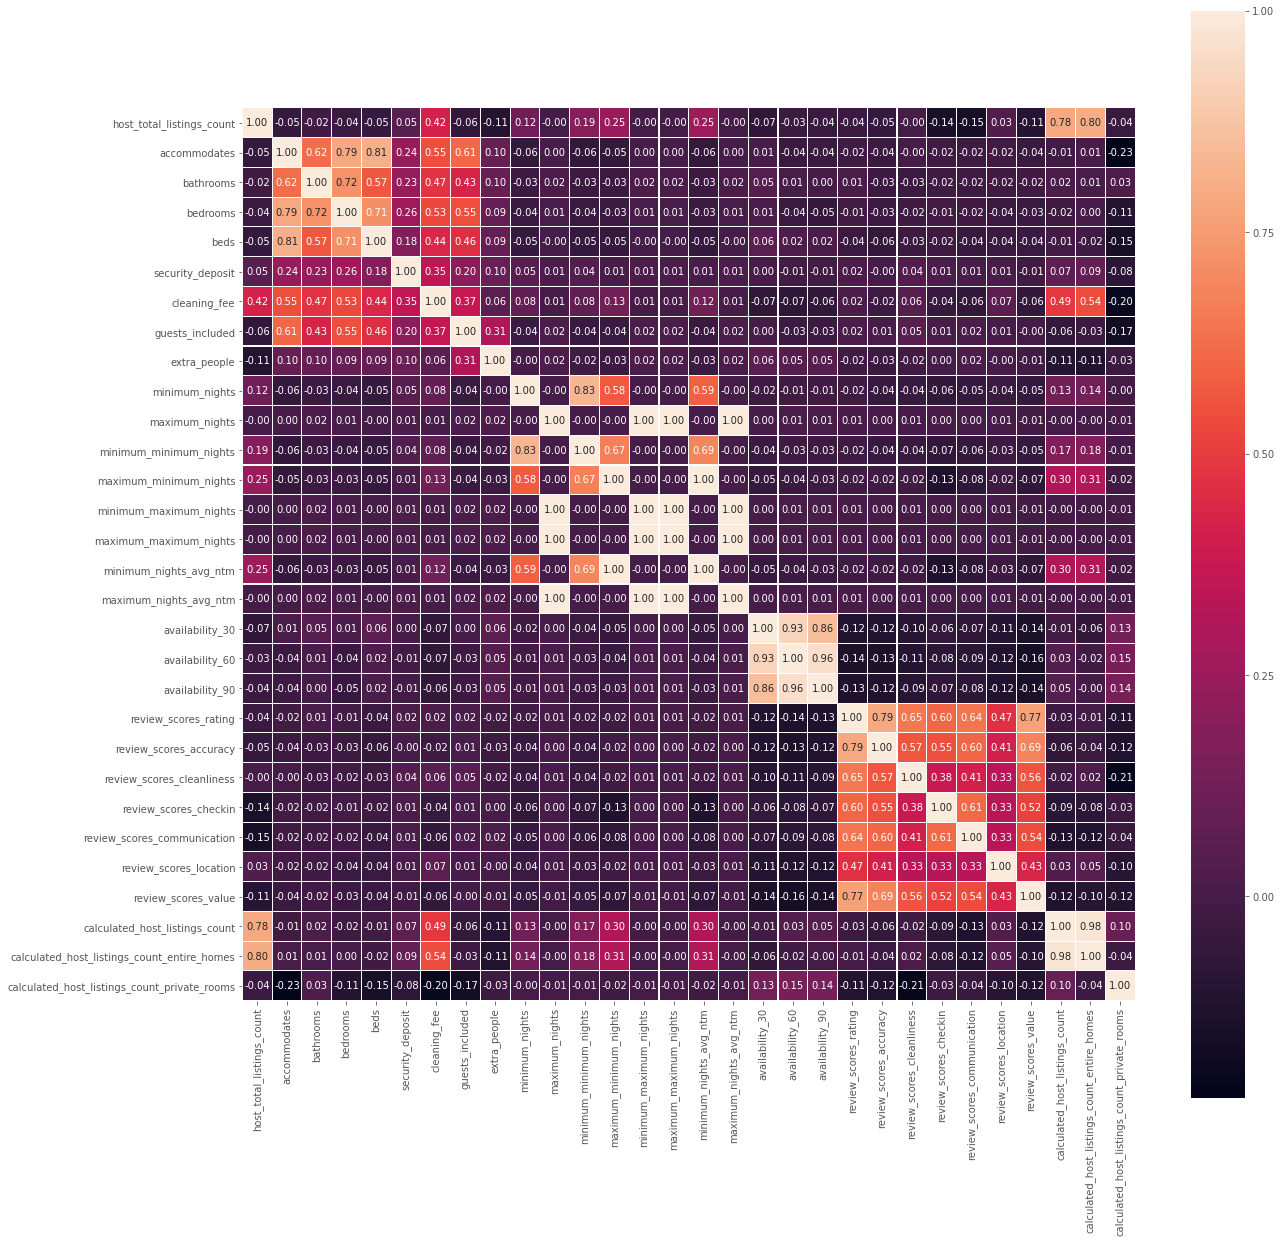

In [24]:
#plot out to see the correlations between variables. 
corr = df.drop('price', axis=1).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=1.0, linewidths=0.1, annot=True, 
                 annot_kws={'size':10}, square=True, fmt=".2f")
plt.show()

In [25]:
# remove high correlation features to avoid collinearity issue
df1 = df.drop(['calendar_updated', "calculated_host_listings_count_entire_homes","bedrooms",'minimum_minimum_nights','maximum_maximum_nights',"maximum_minimum_nights","minimum_maximum_nights",
                "availability_30","availability_60","calculated_host_listings_count","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",'review_scores_communication',"review_scores_location",
            'bathrooms','bedrooms','beds','cleaning_fee','guests_included','review_scores_rating','minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis =1)
df1.head()

,host_response_time,host_response_rate,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,is_location_exact,property_type,room_type,accommodates,...,maximum_nights,has_availability,availability_90,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_private_rooms
0,within an hour,100,5.0,"[email, phone, facebook, reviews, kba, wo...",t,Shaw,t,Townhouse,Entire home/apt,16,...,365,t,60,9.0,t,f,strict_14_with_grace_period,f,f,0
3,within a few hours,100,2.0,"[email, phone, reviews, jumio, offline_gov...",t,Anacostia,f,House,Private room,1,...,365,t,0,9.0,f,f,moderate,f,f,2
5,within an hour,100,2.0,"[email, phone, facebook, reviews, kba, wo...",t,Michigan Park,t,House,Entire home/apt,9,...,365,t,83,8.0,t,f,flexible,f,t,0
6,within an hour,100,2.0,"[email, phone, facebook, reviews, kba]",t,Capitol Hill,t,House,Private room,2,...,365,t,36,10.0,f,f,moderate,f,f,2
8,within a few hours,100,3.0,"[email, phone, facebook, reviews, jumio, ...",t,Eastland Gardens,t,House,Private room,4,...,180,t,89,10.0,f,f,strict_14_with_grace_period,t,t,2


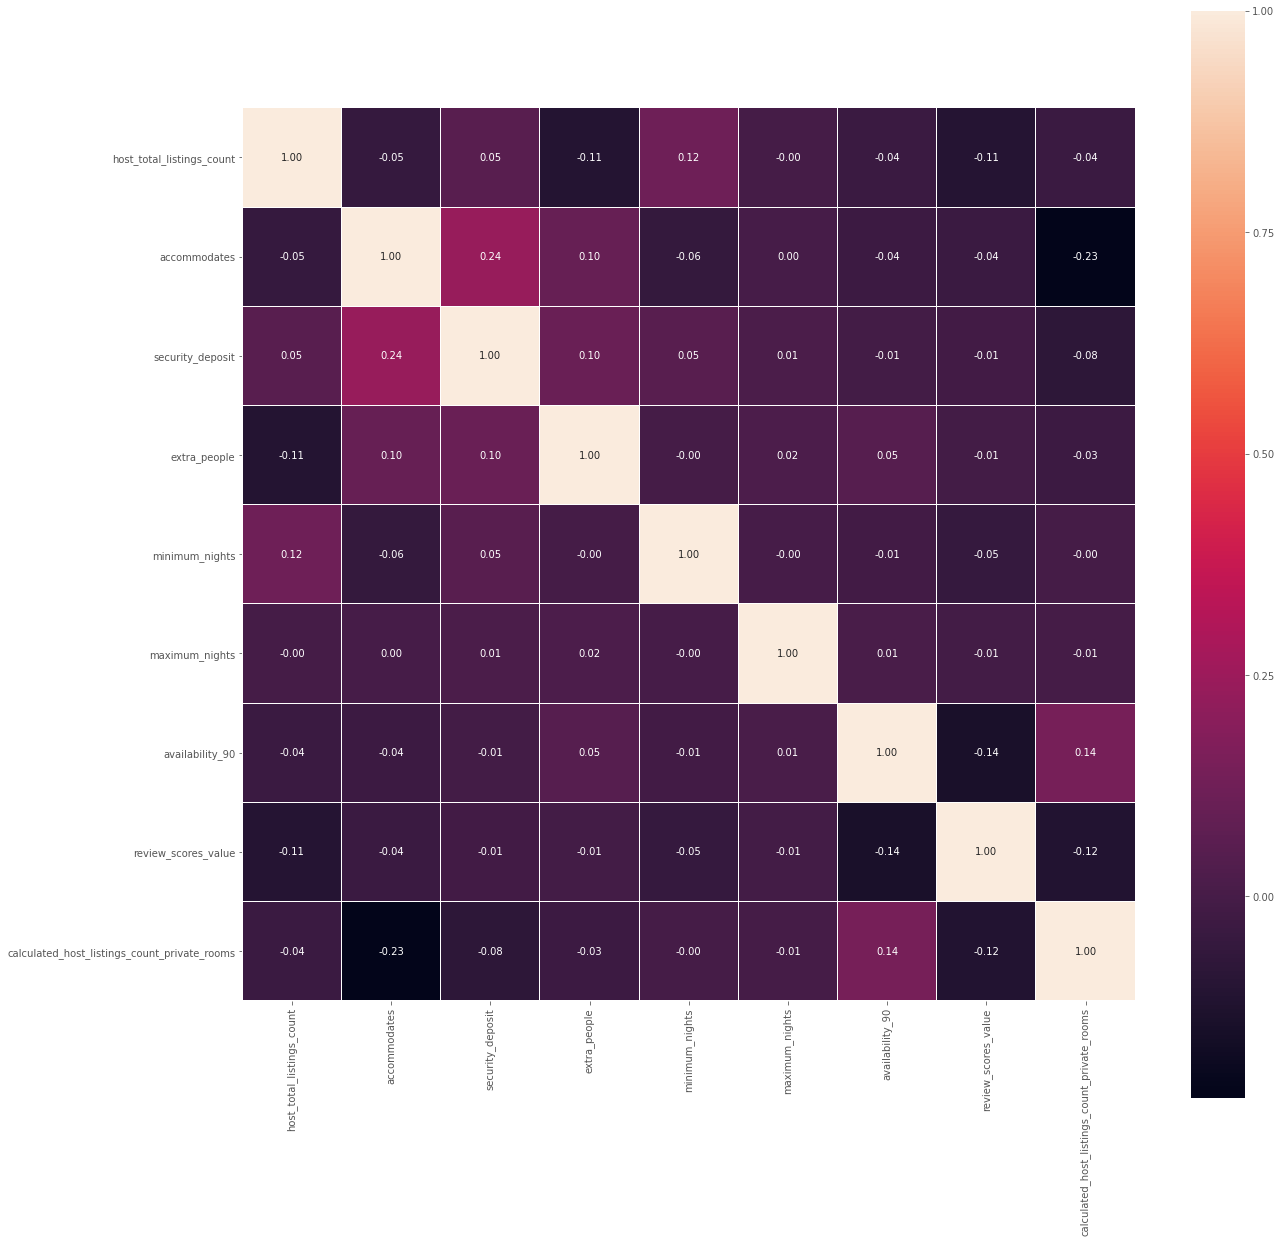

In [26]:
# See the correlation after we dropped those variables.
corr = df1.drop('price', axis=1).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=1.0, linewidths=0.1, annot=True, 
                 annot_kws={'size':10}, square=True, fmt=".2f")
plt.show()

In [27]:
df1 = pd.get_dummies(df1, columns=[ 'neighbourhood', 'property_type','room_type'], drop_first=True)

In [28]:
# Drop the columns we don't need
df1 = df1.drop(['amenities','host_verifications','host_response_time', 'host_has_profile_pic', 'is_location_exact'
                            ,"bed_type","has_availability","cancellation_policy", "require_guest_profile_picture","instant_bookable",
                                   "is_business_travel_ready",'cancellation_policy',"require_guest_phone_verification"],axis = 1)

In [29]:
df1 = df1.drop(['host_response_rate','host_total_listings_count'],axis = 1)

In [30]:
# let's how our current dataset looks like
df1.head()

,accommodates,price,security_deposit,extra_people,minimum_nights,maximum_nights,availability_90,review_scores_value,calculated_host_listings_count_private_rooms,neighbourhood_Adams Morgan,...,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,16,433.0,500.0,20.0,2,365,60,9.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,55.0,0.0,0.0,2,365,0,9.0,2,0,...,1,0,0,0,0,0,0,0,1,0
5,9,120.0,200.0,20.0,2,365,83,8.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,2,83.0,0.0,10.0,7,365,36,10.0,2,0,...,1,0,0,0,0,0,0,0,1,0
8,4,52.0,200.0,10.0,30,180,89,10.0,2,0,...,1,0,0,0,0,0,0,0,1,0


In [31]:
df1.shape

(5444, 137)

In [32]:
col_mapping = [f"{c[0]}:{c[1]}" for c in enumerate(df1.columns)]
col_mapping

['0:accommodates',
 '1:price',
 '2:security_deposit',
 '3:extra_people',
 '4:minimum_nights',
 '5:maximum_nights',
 '6:availability_90',
 '7:review_scores_value',
 '8:calculated_host_listings_count_private_rooms',
 '9:neighbourhood_Adams Morgan',
 '10:neighbourhood_American University Park',
 '11:neighbourhood_Anacostia',
 '12:neighbourhood_Arboretum',
 '13:neighbourhood_Barney Circle',
 '14:neighbourhood_Barry Farm',
 '15:neighbourhood_Bellevue',
 '16:neighbourhood_Benning',
 '17:neighbourhood_Benning Heights',
 '18:neighbourhood_Benning Ridge',
 '19:neighbourhood_Berkley',
 '20:neighbourhood_Bloomingdale',
 '21:neighbourhood_Brentwood',
 '22:neighbourhood_Brightwood',
 '23:neighbourhood_Brookland',
 '24:neighbourhood_Buena Vista',
 '25:neighbourhood_Burleith',
 '26:neighbourhood_Capitol Hill',
 '27:neighbourhood_Carver Langston',
 '28:neighbourhood_Cathedral Heights',
 '29:neighbourhood_Central Northeast/Mahaning Heights',
 '30:neighbourhood_Chevy Chase',
 '31:neighbourhood_Chevy Cha

## ML Start!

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
df1.price.describe()

count    5444.000000
mean      155.468589
std       259.029076
min        10.000000
25%        75.000000
50%       110.000000
75%       168.000000
max      7000.000000
Name: price, dtype: float64

In [35]:
X = df1.drop(['price'],axis=1)
y = df1['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

## Regression Model

In [37]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Linear Regression

In [38]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Training Score: {:.4f}'.format(lreg.score(X_train, y_train)))
score = cross_val_score(lreg, X_train, y_train, cv = 5).mean()
print("Average cross-validation score: {:.4f}".format(score.mean()))

Training Score: 0.4029
Average cross-validation score: -2.1053


In [39]:
y_pred = lreg.predict(X_test)

In [40]:
Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=X_train.columns
Coeff1["Coefficient"]=lreg.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
133,room_type_Hotel room,-1.002956e+03
123,property_type_Guesthouse,-4.208514e+02
128,property_type_Other,-4.126064e+02
122,property_type_Guest suite,-3.949092e+02
120,property_type_Condominium,-3.904005e+02
127,property_type_Loft,-3.901179e+02
114,property_type_Apartment,-3.882020e+02
132,property_type_Villa,-3.819940e+02
131,property_type_Townhouse,-3.521209e+02
119,property_type_Bungalow,-3.500962e+02


## Model Interpretation¶
* We first look at the Adjusted R square value since this is a Multiple linear regression. It tell us that our independent variables can explain 40.3% of variations in our dependent variable, which is price.

In [41]:
#calculate rmse
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse1

178.92838738790223

## Lasso

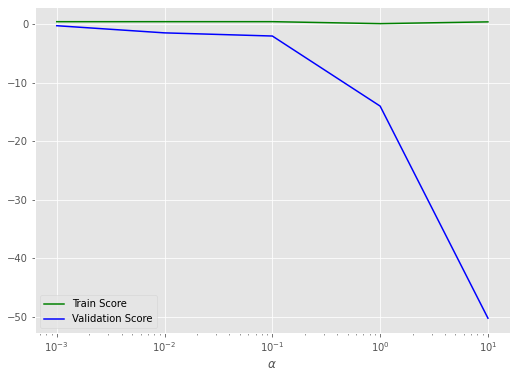

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.399685,-0.287679,"{'alpha': 0.1, 'max_iter': 10000}"
2,0.403956,-1.509647,"{'alpha': 0.01, 'max_iter': 10000}"
3,0.404371,-2.048631,"{'alpha': 0.001, 'max_iter': 10000}"
4,0.068992,-14.024709,"{'alpha': 10, 'max_iter': 10000}"
5,0.368240,-50.257587,"{'alpha': 1, 'max_iter': 10000}"


In [42]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter':[10000]}
lasso_reg = GridSearchCV(Lasso(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
lasso_reg.fit(X_train, y_train)
lasso_result = pd.DataFrame(lasso_reg.cv_results_)
lasso_result.index = lasso_result.rank_test_score
lasso_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(8.5, 6))
plt.plot(x_range, lasso_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

lasso_result[['mean_train_score', 'mean_test_score', 'params']]

In [43]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    lasso_reg.best_params_, lasso_reg.best_score_))

Best Parameter: {'alpha': 0.1, 'max_iter': 10000}
Average cross-validation score: -0.2877


In [44]:
#Let's see our best parameter goes
Lassoreg = Lasso(alpha=0.1,max_iter=10000)
Lassoreg.fit(X_train, y_train) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
#RMSE
y_pred= Lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

175.6930779991531


In [46]:
CoeffLS1 = pd.DataFrame(columns=["Variable","Coefficients"])
CoeffLS1["Variable"]=X_train.columns
CoeffLS1["Coefficients"]=Lassoreg.coef_
CoeffLS1.sort_values("Coefficients", ascending = False)

,Variable,Coefficients
124,property_type_Hostel,2643.393202
47,neighbourhood_Foggy Bottom,299.693914
30,"neighbourhood_Chevy Chase, MD",299.357222
118,property_type_Boutique hotel,273.752003
58,neighbourhood_Georgetown,162.258396
86,neighbourhood_Observatory Circle,156.803060
116,property_type_Bed and breakfast,142.494144
110,neighbourhood_West End,125.732403
39,neighbourhood_Downtown/Penn Quarter,120.109841
107,neighbourhood_U Street Corridor,118.839513


# RandomForest

In [47]:
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
print(regrRM.score(X_train, y_train))
y_pred= regrRM.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9741355245319984
230.44240506693674


We get R squared value at 93.6%! There is obviously a problem of overfitting

In [49]:
# Using feature importance, we can see which feature had most weight
regrRM.feature_importances_

array([1.58631439e-01, 2.72214248e-02, 4.79522991e-02, 3.22731200e-02,
       9.69686617e-02, 4.53885033e-02, 8.71170681e-03, 9.50074477e-02,
       7.45376240e-04, 3.23777891e-05, 7.15695533e-05, 0.00000000e+00,
       1.07102238e-04, 2.50231863e-05, 3.57772718e-05, 4.55811757e-06,
       2.33032072e-06, 3.62900516e-05, 9.56802354e-07, 7.64497207e-03,
       2.59354345e-05, 1.22243738e-04, 1.25789489e-04, 1.03871036e-04,
       8.05892353e-05, 1.00273358e-01, 1.23341709e-05, 1.05216592e-05,
       2.45718213e-04, 4.94549831e-05, 4.70171523e-04, 2.56808098e-06,
       4.35394342e-05, 4.76222362e-05, 9.74677115e-04, 1.01140065e-04,
       3.27067154e-05, 1.13681693e-05, 3.50153875e-05, 3.70705369e-03,
       1.57722321e-03, 2.03441290e-05, 1.41423176e-07, 6.21991886e-05,
       1.68915728e-04, 2.43303128e-05, 1.32600309e-04, 2.36506832e-02,
       1.19430048e-04, 1.09086440e-05, 4.43807925e-06, 6.81896241e-06,
       2.83814093e-06, 1.79393477e-05, 1.81641597e-05, 3.09759097e-05,
      

## Lets see what we can do to prevent overfitting
* We will set max depth to 50. This ensures that branching stops after 50th branching, otherwise each sample may have its branch and overfit.
* We will use min_samples_split as 5. The default value is 2. This means that each internal node will split as long as it h as a minimum of two sample. We dont want that!
* We will use min_samples_leaf as 4. The default is 1. This means that a node is considered leaf node if it has just one sample. This can cause severe overfitting!

In [77]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
### We get a smaller value for R squared
print(regrRM2.score(X_train, y_train))
y_pred= regrRM2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.8362624551214055
188.98186599950705


In [63]:
CoeffRM2 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM2["Variable"]=X_train.columns
CoeffRM2["FeatureImportance"]=regrRM2.feature_importances_
CoeffRM2.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
124,property_type_Hostel,2.827709e-01
0,accommodates,2.170590e-01
5,availability_90,6.594029e-02
7,calculated_host_listings_count_private_rooms,6.348620e-02
2,extra_people,6.173166e-02
4,maximum_nights,4.450745e-02
135,room_type_Shared room,4.123413e-02
47,neighbourhood_Foggy Bottom,3.640443e-02
3,minimum_nights,3.480185e-02
1,security_deposit,3.370389e-02


## CrossValidation

In [64]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [69]:
#  Use the random grid to search for best hyperparameters
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [70]:
### Final R squared value
rf2_random.score(X_train, y_train)

0.9932299230340975

In [71]:
rf2_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 26,
 'bootstrap': False}

In [72]:
### We finally have the least RMSE among all model!
y_pred = rf2_random.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

229.8377091065717


## Conclusion
RandomForest has best R square, which is 0.836, and mean squared error is 188.96. Which mean it can interprect 83.6% of variation in our variables.